
None
sity
None
-Fort Collins
None
nverAnschutz Medical Campus
None
 Urbana-Champaign
None
sity
None
anoa
None
ilo
None

None
rt Smith
None
y
None
y
None
nnsylvania
None
gton
None
ncoln
None
ina Beaufort
None

None

None

None
rsity
None
ina Wilmington
None

None
ty
None

None
ty
None

None
Vegas
None
ity
None

None

None


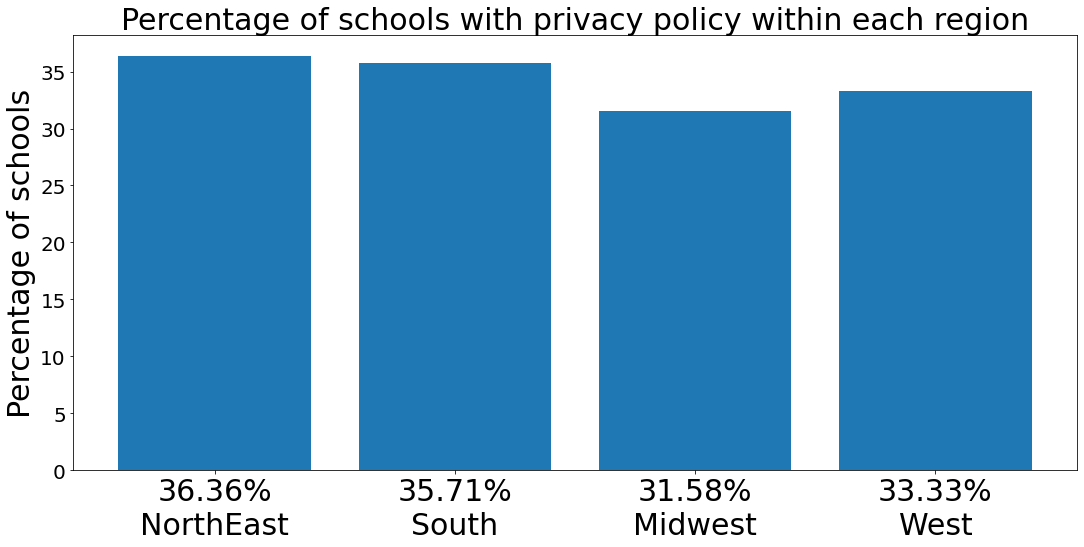

In [20]:
#!/usr/bin/env python
# coding: utf-8

# In[3]:


# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import json
import os
#import readability
import textstat
import matplotlib.pyplot as plt
import numpy as np
from nltk import tokenize
from itertools import islice
from scipy import stats

countFile = 0
countPolicyText = 0
db={}
formulas = ["FKG", "FRES", "NDC", "GFI", "SMOG"]
northeastStates = ["ME", "NH", "VT", "MA", "CT", "RI", "NY", "PA", "NJ"]
southStates = ["MD", "DE", "WV", "VA", "KY", "NC", "TN", "SC", "GA", "FL", "AL", "MS", "AR", "LA", "OK", "TX"]
midwestStates = ["OH", "MI", "IN", "WI", "IL", "MN", "IA", "MO", "ND", "SD", "NE", "KS",]
westStates = ["MT", "WY", "CO", "NM", "ID", "UT", "AZ", "WA", "OR", "CA", "HI", "AK",  "NV"]



FKGScores = {}
FRESScores = {}
NDCScores = {}
GFIScores = {}
SMOGScores = {}

def numberOfSentences(txt):
    #splittedText = tokenize.sent_tokenize(txt)
    count = 0
    #for line in splittedText:
    for line in txt:
        count += 1
    return count


def findNextTenSentences(txt, nthLine):
    count = 1
    extractText = ""
    for line in txt:
        if count >= nthLine:
            extractText += line
            extractText += "\n"
            #print(line)
        count += 1
        if count == nthLine + 10:
            break
    return extractText
    #for line in islice(txt, nthLine):
    #    print(line)

def extractTextForSMOG(txt):
    splittedText = tokenize.sent_tokenize(txt)
    numOfSentences = numberOfSentences(splittedText)
    if numOfSentences < 30:
        return None
    beginning = findNextTenSentences(splittedText, 10)
    middle = findNextTenSentences(splittedText, int(numOfSentences/2) - 5)
    end = findNextTenSentences(splittedText, numOfSentences-10)
    return beginning + middle + end

def smog_cal(txt):
    if extractTextForSMOG(txt) is None:
        return 0
    else:
        return textstat.smog_index(extractTextForSMOG(txt))



#Scores = {"FKGScores":FKGScores, "FRESScores":FRESScores, "NDCScores":NDCScores, "GFIScores":GFIScores, "SMOGScores":SMOGScores}
#step = 1
#for dirPath, dirNames, fileNames in os.walk(r"../data", topdown=False):
for dirPath, dirNames, fileNames in os.walk(r"../data", topdown=False):
    #print(dirPath)
    #print(dirNames)
    #print(dirPath[-2:])
    #print(step)
    #step += 1
    for f in fileNames:
        #print(os.path.join(dirPath, f))
        #print(dirPath[36:])
        #print(dirNames)
        if f == "privacy_policy.json":
            countFile += 1
            with open(os.path.join(dirPath, f), 'r', encoding='utf-8') as json_file:
                data = json.load(json_file)
                for key1, value1 in data.items():
                    for element in value1:
                        #print(dirPath[36:])
                        #print(element["policy_text"])
                        stateName = dirPath[33:35]
                        #if element["is_covid_specific"] is True:
                        try:
                            if element["is_covid_specific"] is True:
                                FKG = textstat.flesch_kincaid_grade(element["policy_text"])
                                FRES = textstat.flesch_reading_ease(element["policy_text"])
                                NDC = textstat.dale_chall_readability_score(element["policy_text"])
                                GFI = textstat.gunning_fog(element["policy_text"])
                                #SMOG = textstat.smog_index(element["policy_text"])
                                SMOG = smog_cal(element["policy_text"])
                                record = {'FKG':FKG, 'FRES':FRES, 'NDC':NDC, 'GFI':GFI, 'SMOG':SMOG}
                                #db[dirPath[36:]] = record
                                #print(dirPath[36:])
                                #print(FKG, FRES, NDC, GFI, SMOG)
                                countPolicyText += 1
                                
                                FKGScores[dirPath[36:]] = FKG
                                FRESScores[dirPath[36:]] = FRES
                                NDCScores[dirPath[36:]] = NDC
                                GFIScores[dirPath[36:]] = GFI
                                SMOGScores[dirPath[36:]] = SMOG
                                
                                if stateName in northeastStates:
                                    region = "NorthEast"
                                elif stateName in southStates:
                                    region = "South"
                                elif stateName in midwestStates:
                                    region = "MidWest"
                                elif stateName in westStates:
                                    region = "West"
                                
                                record["region"] = region
                                db[dirPath[36:]] = record
                                #print(score)
                                #db[dirPath[36:]] = score
                                """
                                    score = readability.getmeasures(element["policy_text"], lang="en")
                                    
                                    #print(dirPath[36:])
                                    #print(score['readability grades']['FleschReadingEase'])
                                    
                                    if score['readability grades']['FleschReadingEase'] < 0:
                                        print(dirPath[36:])
                                        print(score['readability grades']['FleschReadingEase'])
                                    
                                    db[dirPath[36:]] = score['readability grades']['FleschReadingEase']
                                    #for key2, value2 in element.items():
                                    #    print(0)
                                    """
                        except:
                            if dirPath[36:] not in db:
                                print(dirPath[36:])
                                print("None")
                                #pass
                                #db[dirPath[36:]] = None
                            #pass
                    break
#                     print(0)

# Scores = {"FKGScores":FKGScores, "FRESScores":FRESScores, "NDCScores":NDCScores, "GFIScores":GFIScores, "SMOGScores":SMOGScores}
# count = [0,0,0,0,0]
# countNDC = 0
# for key, value in db.items():
#     if value["FKG"] >= 8:
#         count[0] += 1
#     if value["FRES"] <= 70:
#         count[1] += 1
#     if value["NDC"] >= 6.9:
#         count[2] += 1
#     if value["GFI"] >= 8:
#         count[3] += 1
#     if value["SMOG"] >= 8:
#         count[4] += 1

# """
# print("Above 8th grade")
# print("FKG: ", count[0]/countPolicyText)
# print("FRES: ", count[1]/countPolicyText)
# print("NDC: ", count[2]/countPolicyText)
# print("GFI: ", count[3]/countPolicyText)
# print("SMOG: ", count[4]/countPolicyText)
# """


# ##################

# #category = {}
# categories = {}

# for key1, value1 in Scores.items():
#     category = {}
#     category.clear()
#     if key1 != "FRESScores":
#         #category = {}
#         for key2, value2 in value1.items():
#             for i in range(0,50,1):
#                 if value2 < i:
#                     if i < 10:
#                         category_Name = "[" + "0" + str(i-1) + "," + "0" + str(i) + ")"
#                     elif i == 10:
#                         category_Name = "[" + "0" + str(i-1) + "," + str(i) + ")"
#                     else:
#                         category_Name = "[" + str(i-1) + "," + str(i) + ")"
#                     if category_Name in category:
#                         category[category_Name] += 1
#                     else:
#                         category[category_Name] = 1
#                     break
#             #print(key1)
#             #print(category)
#         if key1 == "FKGScores":
#             categories["FKGScores"] = category
#         elif key1 == "NDCScores":
#             categories["NDCScores"] = category
#         elif key1 == "GFIScores":
#             categories["GFIScores"] = category
#         elif key1 == "SMOGScores":
#             categories["SMOGScores"] = category
#     else:
#         #category = {}
#         for key2, value2 in value1.items():
#             for i in range(0,100,10):
#                 if value2 < i:
#                     if i < 10:
#                         category_Name = "[" + "0" + str(i-1) + "," + "0" + str(i) + ")"
#                     elif i == 10:
#                         category_Name = "[" + "0" + str(i-1) + "," + str(i) + ")"
#                     else:
#                         category_Name = "[" + str(i-1) + "," + str(i) + ")"
#                     #category_Name = "[" + str(i) + "," + str(i+10) + ")"
#                     if category_Name in category:
#                         category[category_Name] += 1
#                     else:
#                         category[category_Name] = 1
#                     break
#             #print(category)
#         if key1 == "FRESScores":
#             categories["FRESScores"] = category



# #scoresTypes = ["FKGScores", "FRESScores", "GFIScores", "NDCScores", "SMOGScores"]
# scoresTypes = ["FKG", "FRES", "GFI", "NDC", "SMOG"]
# #northeast = []
# #south = []
# #midwest = []
# #west = []
"""


for key1, value1 in db.items():
    if value1["region"] == "NorthEast":
        for scoresType in scoresTypes:
            #northeast.append([key1, {scoresType:Scores[scoresType][key1]}])
            northeast.append({scoresType:[Scores[scoresType][key1], key1]})
        #print("West-", key1)
        #print(Scores["FKGScores"][key1])
        #northeast.append()
    elif value1["region"] == "South":
        for scoresType in scoresTypes:
            south.append({scoresType:[Scores[scoresType][key1], key1]})
        #print("South-", key1)
    elif value1["region"] == "MidWest":
        for scoresType in scoresTypes:
            midwest.append({scoresType:[Scores[scoresType][key1], key1]})
        #print("Midwest-", key1)
    elif value1["region"] == "West":
        for scoresType in scoresTypes:
            west.append({scoresType:[Scores[scoresType][key1], key1]})
        #print("West-", key1)
    
    
    #value1["FKGScores"]
    #value1["FRESScores"]
    #value1["GFIScores"]
    #value1["NDCScores"]
    #value1["SMOGScores"]



for i in northeast:
    northeast[i]["FKGScores"]
    northeast[i]["FRESScores"]
    northeast[i]["GFIScores"]
    northeast[i]["NDCScores"]
    northeast[i]["SMOGScores"]
for i in south:
    
for i in midwest:
    
for i in west:
    
# """
# FKG = []
# FRES = []
# GFI = []
# NDC = []
# SMOG = []

# regionScores = [FKG, FRES, GFI, NDC, SMOG]

# i = 0
# for scoresType in scoresTypes:
#     northeast = []
#     south = []
#     midwest = []
#     west = []
#     for key, value in db.items():
#         if value["region"] == "NorthEast":
#             northeast.append(value[scoresType])
#         elif value["region"] == "South":
#             south.append(value[scoresType])
#         elif value["region"] == "MidWest":
#             midwest.append(value[scoresType])
#         elif value["region"] == "West":
#             west.append(value[scoresType])
#     regionScores[i].append({"northeast":northeast, "south":south, "midwest":midwest, "west":west})
#     #regionScores[i].append({"south":south})
#     #regionScores[i].append({"midwest":midwest})
#     #regionScores[i].append({"west":west})
#     i += 1

# #Q1 = np.percentile(data, 25, interpolation = 'midpoint')
# #Q3 = np.percentile(data, 75, interpolation = 'midpoint')

# scoreName = 0
# for i in regionScores:
#     #x = list(i[0]["northeast"], i[0]["south"], i[0]["west"], i[0]["midwest"])
#     y = [stats.trim_mean(i[0]["northeast"], 0.25), stats.trim_mean(i[0]["south"], 0.25), 
#              stats.trim_mean(i[0]["midwest"], 0.25), stats.trim_mean(i[0]["west"], 0.25)]
#     x = ["Northeast", "South", "Midwest", "West"]
#     fig = plt.figure(figsize=(18,8))
#     plt.bar(x, y)
#     plt.ylabel("Readability Score - Midquartile")
#     plt.xlabel("Regions")
#     plt.title(f"{scoresTypes[scoreName]} Readability Scores of Privacy Policies")
#     plt.savefig(f'C:\\Users\\Lee\\csc533-project\\figures\\readability-score-{scoresTypes[scoreName]}-regions.png')
#     scoreName += 1







# # In[27]:


# plt.rcParams.update({'font.size': 16})

# for key1, value1 in categories.items():
#     if key1 == "SMOGScores":
#         x = list(value1.keys())
#         y = []
#         x.sort()
#         x.remove("[00,01)")
#         for key2 in x:
#             if key2 != "[00,01)":
#                 y.append(value1[key2])
#         pass
#     else:
#         x = list(value1.keys())
#         y = []
#         x.sort()    
#         #print(x)
#         #print("\n")
#         for key2 in x:
#             y.append(value1[key2])
        
#     fig = plt.figure(figsize=(18,8))
#     plt.bar(x, y)
#     plt.xlabel("Readability Score")
#     plt.ylabel("Number of Occurances")
#     plt.title(f"{key1} Readability Scores of Privacy Policies")
    
#     #plt.savefig(f'../figures/readability-score-{key1}.png')
#     plt.savefig(f'C:\\Users\\Lee\\csc533-project\\figures\\readability-score-{key1}.png')
    
#     #plt.tick_params(axis='x', labelsize=4)
#     #fig = plt.figure(figsize=(12,4))
#     plt.show()


# # In[29]:


# plt.rcParams.update({'font.size': 16})
# key = 'FRESScores'
# scores = categories[key]

# x = list(categories[key].keys())
# y = []
# x.sort(reverse=True)    
# for key2 in x:
#     y.append(scores[key2])

# fig = plt.figure(figsize=(18,8))
# plt.bar(x, y)
# plt.xlabel("Readability Score")
# plt.ylabel("Number of Occurances")
# plt.title(f"{key} Readability Scores of Privacy Policies")

# #plt.savefig(f'../figures/readability-score-{key}.png')
# plt.savefig(f'C:\\Users\\Lee\\csc533-project\\figures\\readability-score-{key}.png')
# #C:\Users\Lee\csc533-project\figures

# #plt.tick_params(axis='x', labelsize=4)
# #fig = plt.figure(figsize=(12,4))
# plt.show()


# # In[ ]:


northeastSchoolsWithPrivacyPolicy = []
southSchoolsWithPrivacyPolicy = []
midwestSchoolsWithPrivacyPolicy = []
westSchoolsWithPrivacyPolicy = []

# for university, value in db.items():
#     if value["region"] == "NorthEast":
#         northeastSchoolsWithPrivacyPolicy.append(university)
#     elif value["region"] == "South":
#         southSchoolsWithPrivacyPolicy.append(university)
#     elif value["region"] == "MidWest":
#         midwestSchoolsWithPrivacyPolicy.append(university)
#     elif value["region"] == "West":
#         westSchoolsWithPrivacyPolicy.append(university)

northeastSchools = []
southSchools = []
midwestSchools = []
westSchools = []

# northeastSchoolsWithSelfReporting = []
# southSchoolsWithSelfReporting = []
# midwestSchoolsWithSelfReporting = []
# westSchoolsWithSelfReporting = []

for dirPath, dirNames, fileNames in os.walk(r"../data", topdown=False):
    #print(dirPath)
    #print(dirNames)
    #print(dirPath[-2:])
    #print(step)
    #step += 1
    for f in fileNames:
        if f == "privacy_policy.json":
            with open(os.path.join(dirPath, f), 'r', encoding='utf-8') as json_file:
                data = json.load(json_file)
                schoolName = dirPath.split('/')[3]
                stateName = dirPath.split('/')[2]
                #stateName = dirPath[33:35]
                #print(schoolName)
                #schoolName = dirPath[36:]
                #print(stateName)
                #print(dirPath[36:])
                if data.get("has_self_reporting_site") or (data.get("note") and "testing" not in data.get("note")):
                #data.get("has_self_reporting_site") or (data.get("note") and "testing" not in data.get("note")):
                    if stateName in northeastStates:
                        northeastSchools.append(schoolName)
                    elif stateName in southStates:
                        southSchools.append(schoolName)
                    elif stateName in midwestStates:
                        midwestSchools.append(schoolName)
                    elif stateName in westStates:
                        westSchools.append(schoolName)
                    else:
                        print("WTF")
                        print(stateName)
                    
                    
                    if data.get("privacy_policy")[0].get("is_covid_specific"):
                        if stateName in northeastStates:
                            northeastSchoolsWithPrivacyPolicy.append(schoolName)
                        elif stateName in southStates:
                            southSchoolsWithPrivacyPolicy.append(schoolName)
                        elif stateName in midwestStates:
                            midwestSchoolsWithPrivacyPolicy.append(schoolName)
                        elif stateName in westStates:
                            westSchoolsWithPrivacyPolicy.append(schoolName)


#         if f == "guidelines.json":
#             with open(os.path.join(dirPath, f), 'r', encoding='utf-8') as json_file:
#                 data = json.load(json_file)
#                 #print(data)
#                 if data["self_reporting"] is not None:
#                     #print(data["self_reporting"])
#                     stateName = dirPath[33:35]
#                     schoolName = dirPath[36:]
#                     if stateName in northeastStates:
#                         northeastSchoolsWithSelfReporting.append(schoolName)
#                     elif stateName in southStates:
#                         southSchoolsWithSelfReporting.append(schoolName)
#                     elif stateName in midwestStates:
#                         midwestSchoolsWithSelfReporting.append(schoolName)
#                     elif stateName in westStates:
#                         westSchoolsWithSelfReporting.append(schoolName)


y = [len(northeastSchoolsWithPrivacyPolicy)*100/len(northeastSchools), len(southSchoolsWithPrivacyPolicy)*100/len(southSchools), 
     len(midwestSchoolsWithPrivacyPolicy)*100/len(midwestSchools), len(westSchoolsWithPrivacyPolicy)*100/len(westSchools)]
x = [f"{round(y[0], 2)}%\nNorthEast", f"{round(y[1], 2)}%\nSouth", f"{round(y[2], 2)}%\nMidwest", f"{round(y[3], 2)}%\nWest"]
fig = plt.figure(figsize=(18,8))
plt.bar(x, y)
#plt.xlabel("Regions", fontsize=30)
plt.ylabel("Percentage of schools", fontsize=30)
plt.title("Percentage of schools with privacy policy within each region", fontsize=30)
plt.xticks(size = 30)
plt.yticks(size = 20)

"""
for p in x:
    width = p.get_width()
    height = p.get_height()
    ax, ay = p.get_xy() 
    x.annotate(f'{height}', (ax + width/2, ay + height*1.02), ha='center')
"""

# #plt.savefig(f'../figures/readability-score-{key}.png')
plt.savefig(f'../figures/percentage-of-schools-with-privacy-policy-in-each-region.png')
plt.show()

# y = [len(northeastSchoolsWithSelfReporting)*100/len(northeastSchools), len(southSchoolsWithSelfReporting)*100/len(southSchools), 
#      len(midwestSchoolsWithSelfReporting)*100/len(midwestSchools), len(westSchoolsWithSelfReporting)*100/len(westSchools)]
# x = [f"{round(y[0], 2)}%\nNorthEast", f"{round(y[1], 2)}%\nSouth", f"{round(y[2], 2)}%\nMidwest", f"{round(y[3], 2)}%\nWest"]
# fig = plt.figure(figsize=(18,8))
# plt.bar(x, y)
# plt.xlabel("Regions")
# plt.ylabel("Percentage of schools with self reporting")
# plt.title("Percentage of schools with self reporting within each region")

# # plt.savefig(f'C:\\Users\\Lee\\csc533-project\\figures\\percentage-of-schools-with-self-reporting-in-each-region.png')
# plt.show()

In [21]:

len(northeastSchoolsWithPrivacyPolicy +southSchoolsWithPrivacyPolicy+midwestSchoolsWithPrivacyPolicy +westSchoolsWithPrivacyPolicy )


27

In [22]:
len(northeastSchools +southSchools +midwestSchools+westSchools)


79